[((5.490079882227173, 9.696293537095206), ('square', (5.0,))), ((18.149113527630433, 10.838077184831228), ('circle', (4.0,))), ((9.59651626315793, 7.31754416483605), ('square', (3.0,))), ((15.988270305849253, 2.1098308638500933), ('circle', (2.0,))), ((4.109589754710556, 4.836112326108012), ('square', (2.0,))), ((12.543953443424941, 9.399159774343254), ('circle', (1.0,)))]


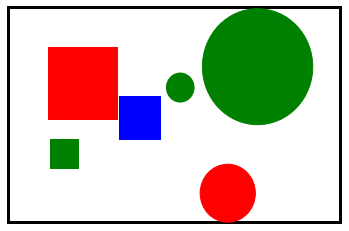

In [20]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
colors = [ 'r','g','b']
with open('input.txt') as f:
    lines = f.readlines()
r_x, r_y = map(float, lines[0].split()[1:])
fig, ax = plt.subplots()
ax.set_xlim([0, r_x])
ax.set_ylim([0, r_y])
rect = plt.Rectangle((0, 0), r_x, r_y, facecolor='none',edgecolor = 'black', linewidth = 6)
ax.add_patch(rect)
shapes = [(line.split()[0], tuple(map(float, line.split()[1:]))) for line in lines[1:]]
shapes.sort(key=lambda s: max(s[1]), reverse=True)
positions = []
for shape in shapes:
    shape_type, shape_dim = shape
    while True:
        x = random.uniform(max(shape_dim), r_x - max(shape_dim))
        y = random.uniform(max(shape_dim), r_y - max(shape_dim))
        pos = Point(x, y)
        overlapping = False
        for p, s in positions:
            s_type, s_dim = s
            if s_type == 'circle':
                s_poly = Point(*p).buffer(s_dim[0])
            else:
                s_poly = Polygon([(p[0]-s_dim[0]/2, p[1]-s_dim[0]/2), 
                                   (p[0]+s_dim[0]/2, p[1]-s_dim[0]/2),
                                   (p[0]+s_dim[0]/2, p[1]+s_dim[0]/2), 
                                   (p[0]-s_dim[0]/2, p[1]+s_dim[0]/2)])
            if shape_type == 'circle':
                shape_poly = pos.buffer(shape_dim[0])
            else:
                shape_poly = Polygon([(x-shape_dim[0]/2, y-shape_dim[0]/2), 
                                      (x+shape_dim[0]/2, y-shape_dim[0]/2),
                                      (x+shape_dim[0]/2, y+shape_dim[0]/2), 
                                      (x-shape_dim[0]/2, y+shape_dim[0]/2)])
            if s_poly.intersects(shape_poly):
                overlapping = True
                break

        if not overlapping:
            positions.append((pos.coords[0], shape))
            break
print(positions)            
with open('output.txt', 'w') as f:
    for pos, shape in positions:
        shape_type, shape_dim = shape
        f.write(f"{shape_type} {shape_dim[0]} {pos[0]} {pos[1]}\n")
import matplotlib.pyplot as plt
with open('output.txt', 'r') as f:
    lines = f.readlines()
for line in lines:
    tokens = line.strip().split()
    shape = tokens[0]
    size = float(tokens[1])
    p = float(tokens[2])
    q = float(tokens[3])
    if shape == 'circle':
        ax.add_artist(plt.Circle((p, q), size, color=random.choice(colors)))
    elif shape == 'square':
        ax.add_artist(plt.Rectangle((p-size/2, q-size/2), size, size, color=random.choice(colors)))
ax.set_xlim(0,r_x)
ax.set_ylim(0,r_y)
ax.set_axis_off()
plt.savefig("figures plotted without overlapping.jpg")
plt.show()